In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
from sklearn.metrics import adjusted_rand_score



from models.PriorParameters import GMMPriorParameters
from models.PriorParameters import BMMPriorParameters
from models.GMMGibbs import GMMGibbs
from models.BMMGibbs import BMMGibbs
from models.GMMVBEM import GMMVBEM
from models.BMMVBEM import BMMVBEM
from models.BMMEM import BMMEM
from models.GMMEM import GMMEM

from utils.ArbitraryImputer import mean_impute, median_impute, mode_impute
from utils.EvaluationUtilities import rmse, multi_restart, run_full_evaluation, get_full_results

from datasets.Dataset import Dataset

In [ ]:
def plot_ari_by_missingness_line(df, metric,title,ylabel):

    # Set style
    # sns.set(style="whitegrid")

    # Create figure and axis
    plt.figure(figsize=(10, 6))

    # Unique methods
    methods = df['method'].unique()
    missing_rates = sorted(df['missing_rate'].unique())

    # Plot each method
    for method in methods:
        sub_df = df[df['method'] == method].sort_values(by='missing_rate')
        plt.errorbar(
            sub_df['missing_rate'],
            sub_df[metric] if metric in sub_df.columns else sub_df[metric],
            yerr=sub_df[f'{metric}_std'] if f'{metric}_std' in sub_df.columns else sub_df[f'{metric}_std'],
            label=method,
            capsize=4,
            marker='o',
            linestyle='-'
        )

    plt.xlabel('Missing Rate')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [8]:
def plot_grouped_bar_metric(df, metric, title, ylabel):

    methods = sorted(df['method'].unique())
    missing_rates = sorted(df['missing_rate'].unique())
    n_methods = len(methods)
    bar_width = 0.8 / n_methods
    x = np.arange(len(missing_rates))

    fig, ax = plt.subplots(figsize=(12, 6))

    for i, method in enumerate(methods):
        # if "mode" in method or "median" in method:
        #     continue
        method_df = df[df['method'] == method].sort_values(by='missing_rate')
        means = method_df[metric].values
        stds = method_df[f"{metric}_std"].values
        ax.bar(x + i * bar_width, means, bar_width, label=method, yerr=stds, capsize=4)

    ax.set_xlabel('Missing Rate')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + bar_width * (n_methods - 1) / 2)
    ax.set_xticklabels([f"{mr:.1f}" for mr in missing_rates])
    ax.legend()
    plt.tight_layout()
    plt.show()

# 1 BMM

## 1.1 Mushroom Dataset

In [ ]:
mushroom_df = pd.read_csv("Results/bmm_mushroom.csv")

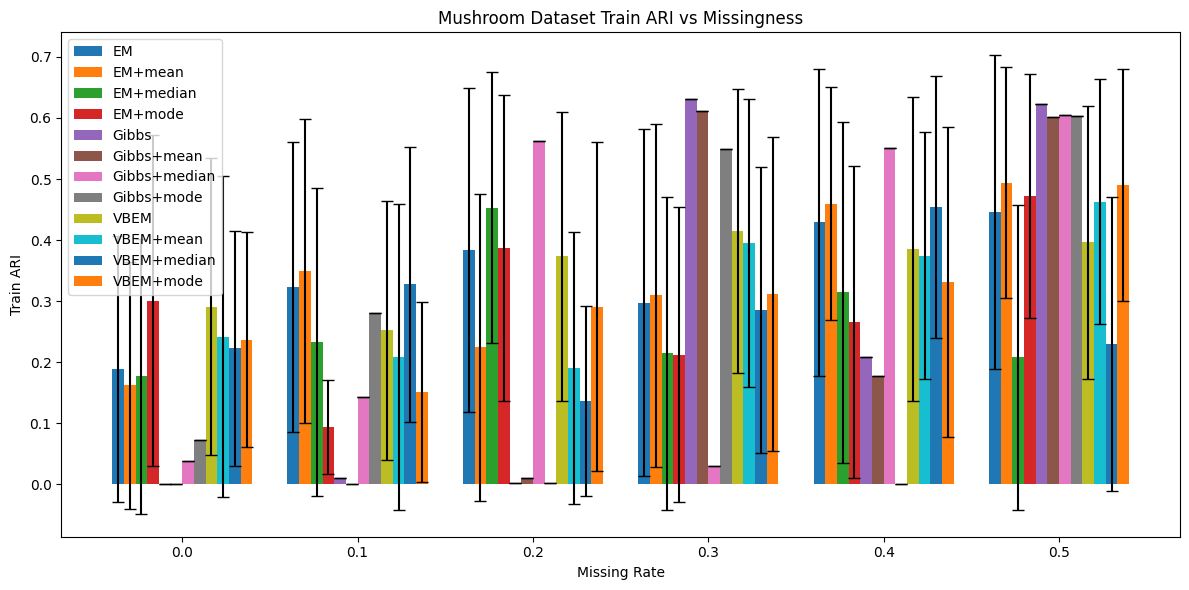

In [22]:
plot_grouped_bar_metric(mushroom_df, metric='train_ARI', title="Mushroom Dataset Train ARI vs Missingness", ylabel="Train ARI")

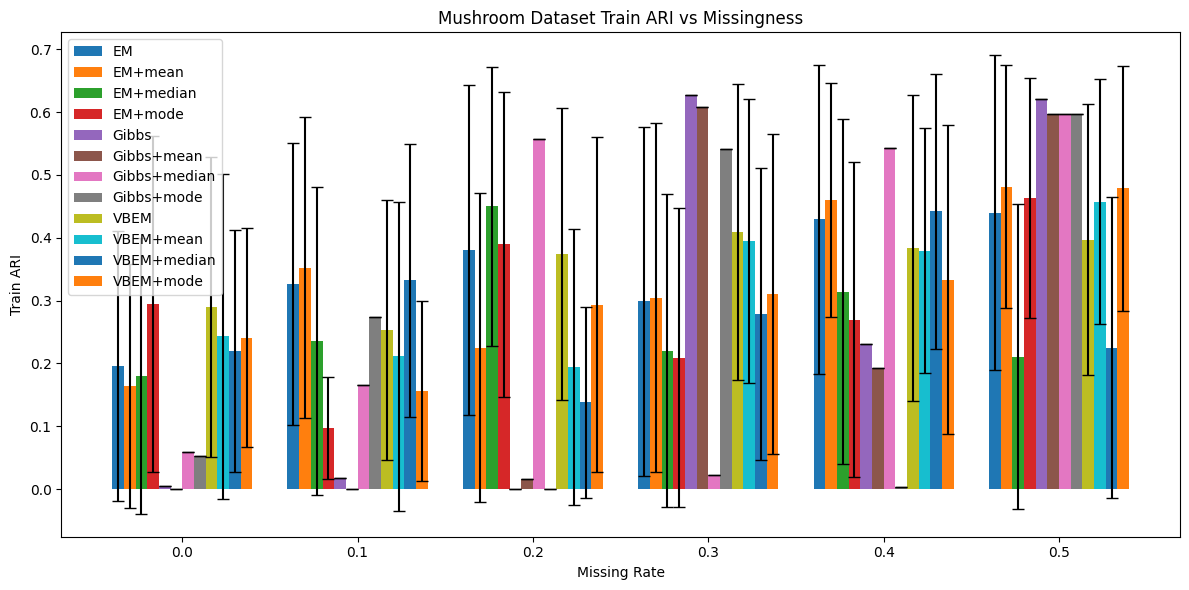

In [23]:
plot_grouped_bar_metric(mushroom_df, metric='test_ARI', title="Mushroom Dataset Train ARI vs Missingness", ylabel="Train ARI")

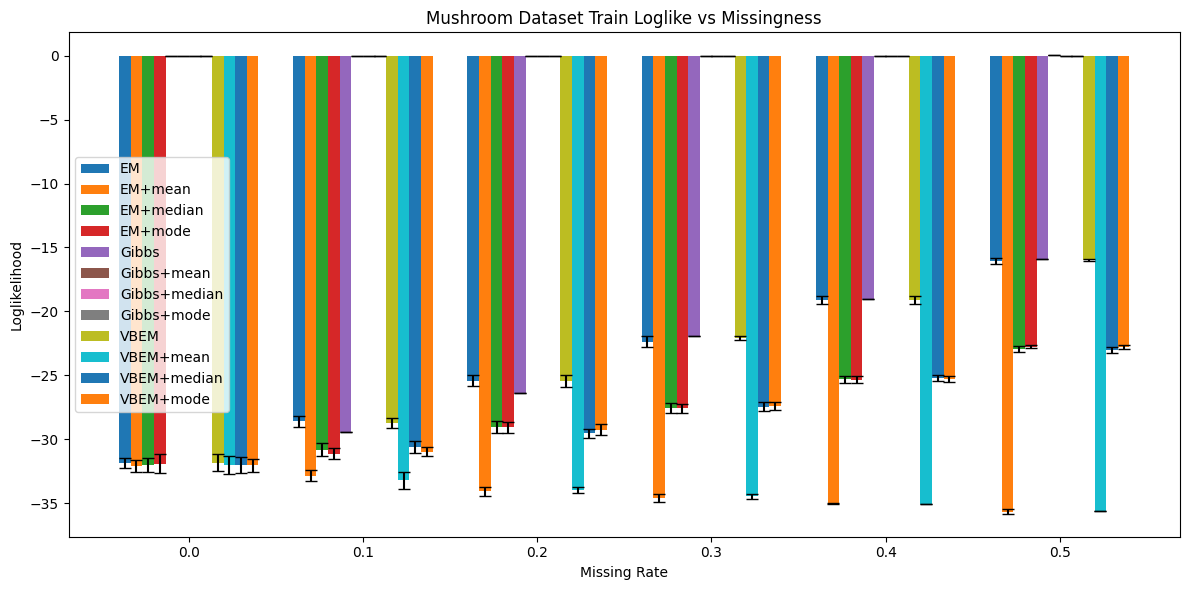

In [24]:
plot_grouped_bar_metric(mushroom_df, metric='loglike', title="Mushroom Dataset Train Loglike vs Missingness", ylabel="Loglikelihood")

## 1.2 Synthetic 

## 1.3 MNIST

In [11]:
mnist_df = pd.read_csv("./Results/bmm_mnist.csv")

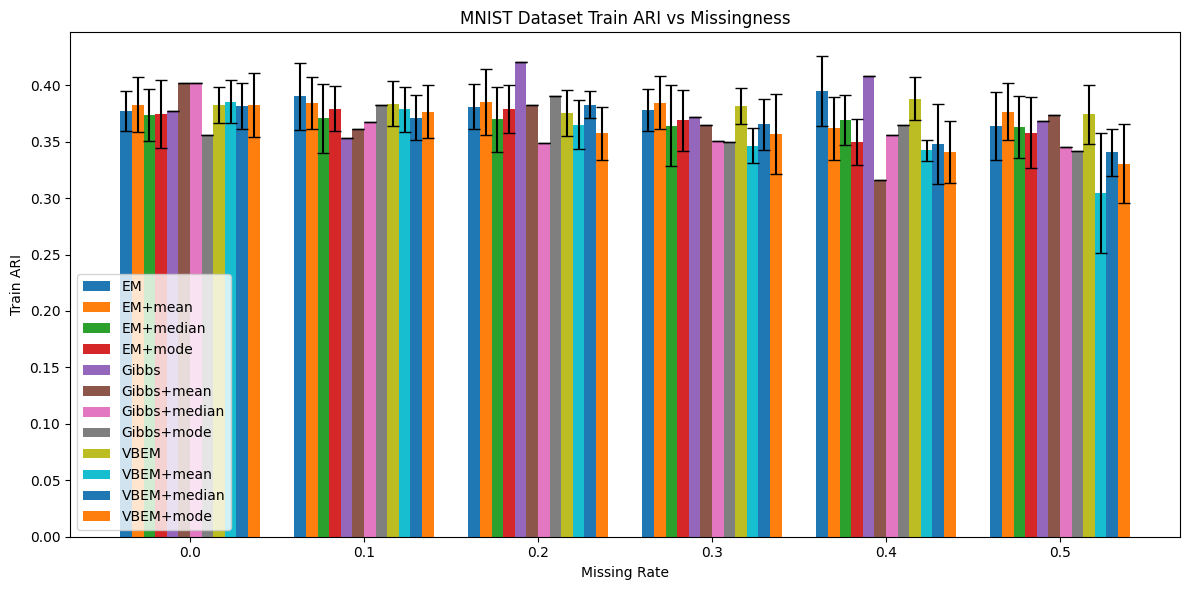

In [12]:
plot_grouped_bar_metric(mnist_df, metric='train_ARI', title="MNIST Dataset Train ARI vs Missingness", ylabel="Train ARI")

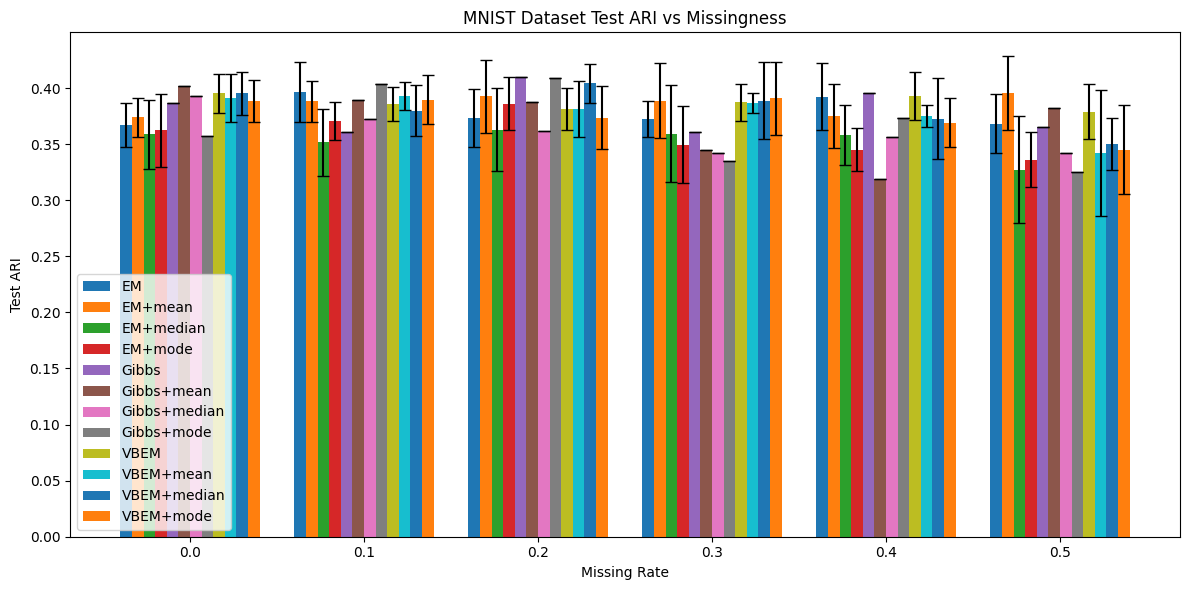

In [17]:
plot_grouped_bar_metric(mnist_df, metric='test_ARI', title="MNIST Dataset Test ARI vs Missingness", ylabel="Test ARI")

## 1.4 MP

---

# 2 GMM

## 2.1 Palmer Penguins

In [14]:
penguin_df = pd.read_csv("./Results/gmm_penguin.csv")

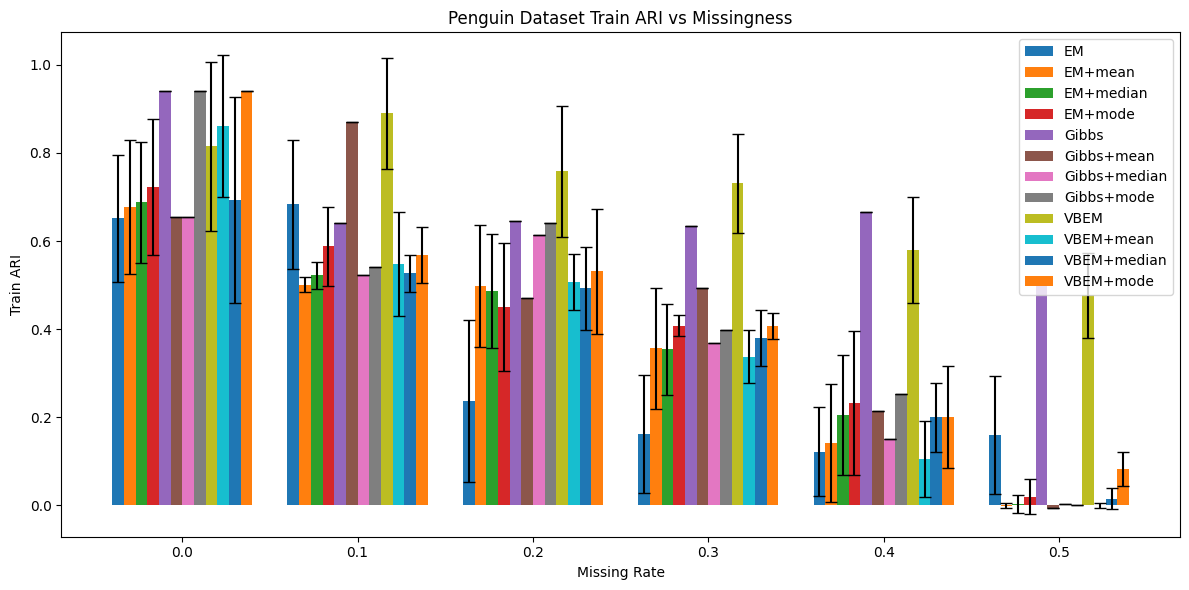

In [16]:
plot_grouped_bar_metric(penguin_df, metric='train_ARI', title="Penguin Dataset Train ARI vs Missingness", ylabel="Train ARI")

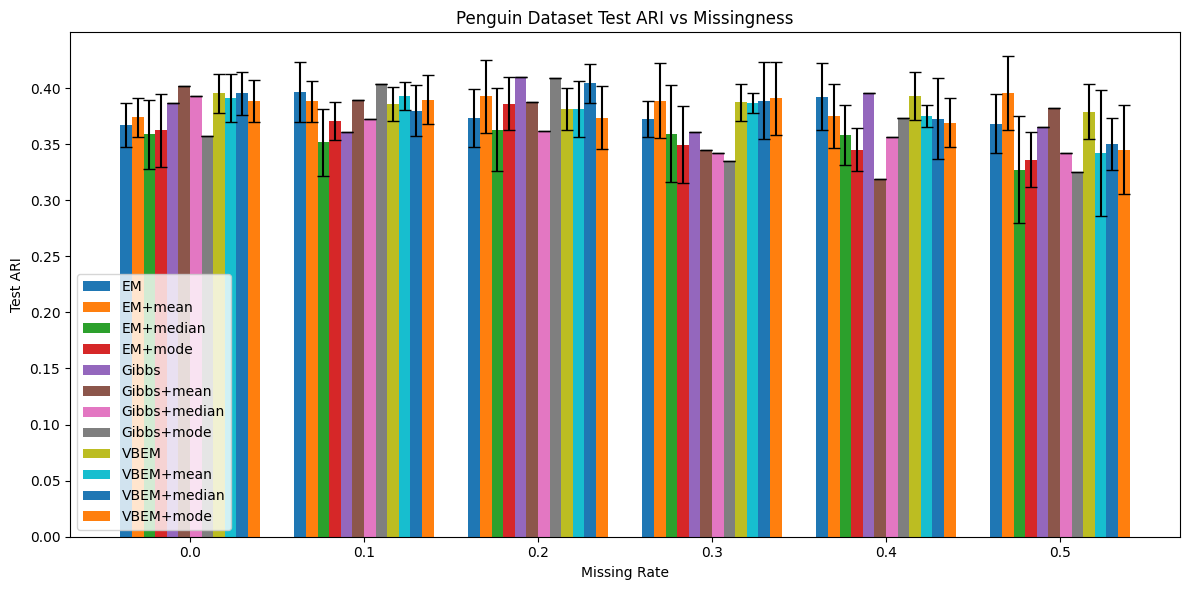

In [18]:
plot_grouped_bar_metric(mnist_df, metric='test_ARI', title="Penguin Dataset Test ARI vs Missingness", ylabel="Test ARI")

## 2.2 IRIS

In [6]:
iris_df = pd.read_csv('./Results/gmm_iris.csv')

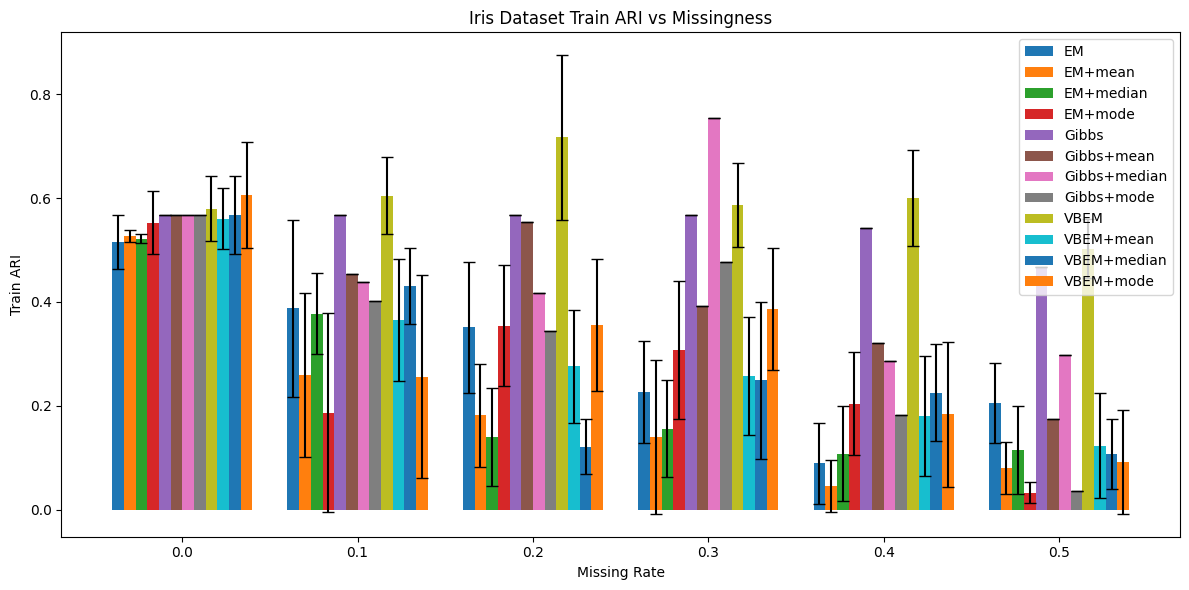

In [9]:
plot_grouped_bar_metric(iris_df, metric='train_ARI', title="Iris Dataset Train ARI vs Missingness", ylabel="Train ARI")

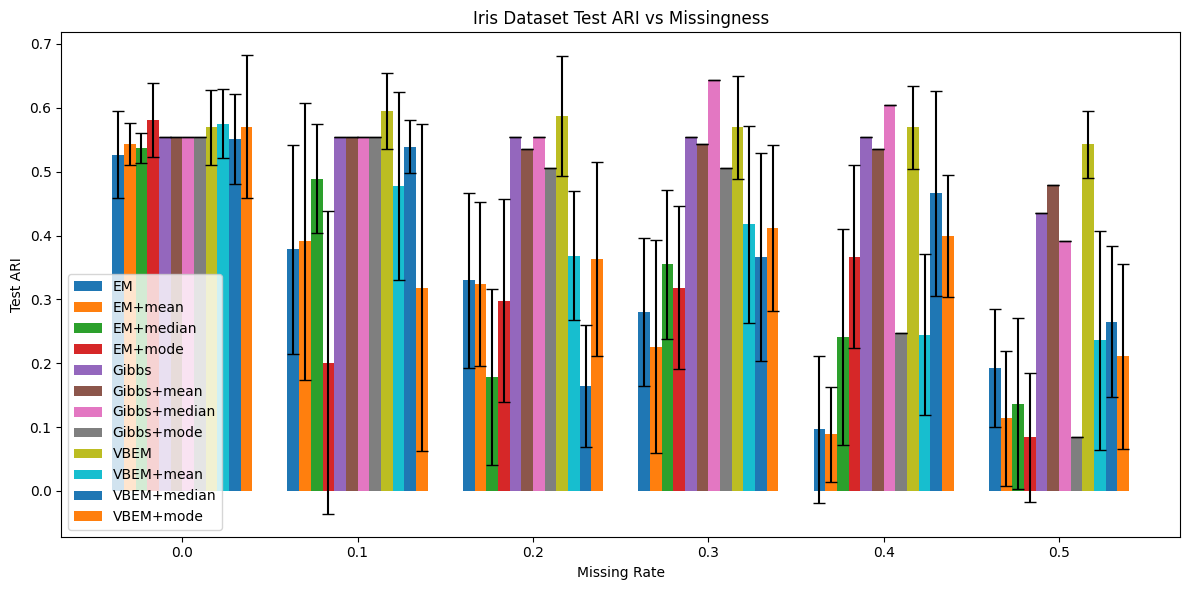

In [19]:
plot_grouped_bar_metric(iris_df, metric='test_ARI', title="Iris Dataset Test ARI vs Missingness", ylabel="Test ARI")

## 2.3 Synthetic